#Preliminary - Data Loading

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from matplotlib import pylab
params = {'xtick.labelsize': 18,
 'ytick.labelsize': 18,
 'axes.titlesize' : 22,
 'axes.labelsize' : 20,
 'legend.fontsize': 18,
 'legend.title_fontsize': 22,
 'figure.titlesize': 24 }
pylab.rcParams.update(params)

## Loading the dataset

In [4]:
#Load train
!rm *.csv

from google.colab import files
print("Please load train the raw csv data")
uploadedData = files.upload()
filename_train = list(uploadedData)[0]

train_df = pd.read_csv(filename_train)

rm: cannot remove '*.csv': No such file or directory
Please load train the raw csv data


Saving train_normalized_v1_new.csv to train_normalized_v1_new.csv


In [5]:
#Load test
!rm *.csv

from google.colab import files
print("Please load test the raw csv data")
uploadedData = files.upload()
filename_test = list(uploadedData)[0]

test_df = pd.read_csv(filename_test)

Please load test the raw csv data


Saving test_normalized_v1_new.csv to test_normalized_v1_new.csv


In [6]:
train_df.shape

(1000, 28)

In [7]:
test_df.shape

(250, 28)

In [8]:
train_df.head()

,age,sex,weight,num_of_siblings,happiness_score,household_income,conversations_per_day,sugar_levels,sport_activity,PCR_01,...,PCR_10,spread,risk,SpecialProperty,num_of_symptoms,pcr_year,pcr_month,pcr_day,latitude,longitude
0,-0.324675,1,-0.076753,0.252450,-0.018765,0.070425,-0.536327,1.212221,-1.064654,0.374706,...,0.778148,-1,-1,0,2.869743,1.0,0.272727,0.333333,-0.245067,0.795844
1,0.168831,1,0.580465,-1.376260,-0.713768,0.070425,0.831854,0.040670,-0.198377,-0.651346,...,2.349866,1,1,1,-0.987439,-1.0,-0.454545,0.666667,-1.562323,1.314065
2,-0.350649,0,1.151739,-0.561905,-0.018765,-0.720867,2.884126,-0.238271,-0.198377,-0.742289,...,1.859553,1,1,0,-0.987439,-1.0,1.000000,-1.000000,-0.715353,0.893196
3,-0.662338,0,-0.193030,-0.561905,0.676237,0.861717,1.173899,-0.461424,-1.064654,0.051875,...,-0.610153,-1,-1,0,-0.023143,1.0,0.454545,1.000000,-2.374315,-0.912287
4,-0.818182,0,-1.391189,-1.376260,-0.713768,0.070425,-0.878372,-1.632976,-0.198377,0.939847,...,-1.514000,1,-1,1,-0.987439,-1.0,0.454545,-0.333333,0.861892,-0.071595


In [9]:
test_df.head()

,age,sex,weight,num_of_siblings,happiness_score,household_income,conversations_per_day,sugar_levels,sport_activity,PCR_01,...,PCR_10,spread,risk,SpecialProperty,num_of_symptoms,pcr_year,pcr_month,pcr_day,latitude,longitude
0,-0.246753,0,0.282189,1.066805,-0.713768,-0.720867,-0.878372,1.044857,-0.198377,0.298780,...,0.554753,1,1,0,-0.987439,1.0,-0.454545,-1.000000,-0.355438,-1.569204
1,-0.142857,1,0.039524,1.066805,-0.713768,2.444301,-0.194282,-0.405636,-0.198377,0.976146,...,0.523974,1,1,1,-0.987439,-1.0,0.272727,0.333333,-0.584961,-1.436164
2,-0.402597,0,1.369126,-1.376260,0.676237,1.653009,0.489809,1.435374,0.667900,0.324727,...,-0.750576,-1,-1,0,-0.023143,1.0,0.090909,-0.666667,-2.091729,-0.878562
3,-0.454545,1,-0.430640,-1.376260,0.676237,0.070425,1.173899,-0.796153,-1.064654,0.536891,...,0.989520,-1,1,1,0.941152,-1.0,0.090909,0.000000,0.437595,0.471398
4,-0.246753,1,0.883796,-0.561905,0.676237,0.070425,-0.878372,0.989069,0.667900,-0.576690,...,-0.588764,1,-1,1,0.941152,1.0,0.454545,-0.666667,-0.977344,1.387443


###visualize_clf(Copied)

In [18]:
#Add Visualize clf
def visualize_clf(clf, X, Y, title,
                  xlabel, ylabel,
                  marker_size=50,
                  grid_length=300,
                  linewidths=None):
    import matplotlib.pyplot as plt
    import pandas as pd
    from matplotlib.colors import ListedColormap

    if isinstance(X, pd.DataFrame):
        X = X.to_numpy()

    # For internal use here, make sure labels are 0 and 1
    Y = np.ravel(Y).astype(int)
    labels = set(Y)
    assert len(labels) == 2, "Can only visualize two unique labels"

    if labels == set([-1,1]):
      Y = (Y + 1) // 2
      labels = set(Y)

    assert labels == set([0,1]), "Could not handle given labels"

    plt.figure(figsize=(8, 8))

    # Parameters
    n_classes = 2
    markers = ["D", "o"]
    palette = sns.color_palette("hls", 2)
    custom_cmap = ListedColormap(palette.as_hex())

    x_delta = np.abs(X[:, 0].max() - X[:, 0].min()) * 0.1
    y_delta = np.abs(X[:, 1].max() - X[:, 1].min()) * 0.1
    x_min, x_max = X[:, 0].min() - x_delta, X[:, 0].max() + x_delta
    y_min, y_max = X[:, 1].min() - y_delta, X[:, 1].max() + y_delta
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, grid_length),
                         np.linspace(y_min, y_max, grid_length))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    cs = plt.contourf(xx, yy, Z, cmap=custom_cmap, alpha=0.35)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(alpha=0.75)

    # Plot the training points
    for i, color, marker in zip(labels, palette, markers):
        idx = np.where(Y == i)
        plt.scatter(X[idx, 0], X[idx, 1], color=color,
                    marker=marker,
                    edgecolor='white', s=marker_size,
                    linewidths=linewidths)

    plt.title(title, fontsize=20)
    plt.axis("tight")
    plt.show()

#Part 1: Basic model selection with k-Nearest Neighbors

**(Q1)**

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


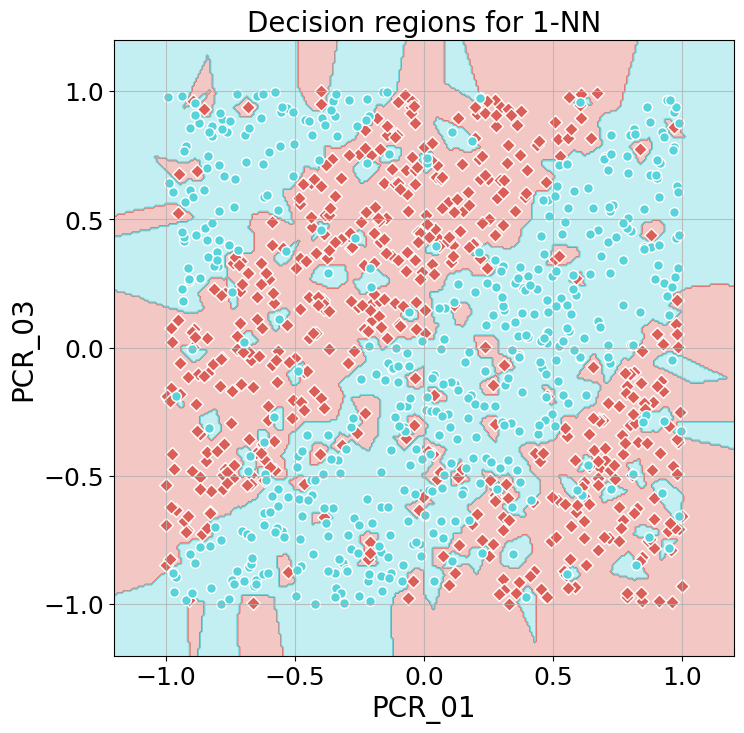


Training Accuracy: 1.0

Test Accuracy: 0.756





In [ ]:
from sklearn.neighbors import KNeighborsClassifier

#Preapre data
train_df_pcr_01_03 = train_df[['PCR_01', 'PCR_03']]
train_df_spread = train_df['spread']

#Train model
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(train_df_pcr_01_03, train_df_spread)

#Visualize decision boundaries
visualize_clf(knn_model, train_df_pcr_01_03, train_df_spread, title="Decision regions for 1-NN", xlabel="PCR_01", ylabel="PCR_03")

#calc_accuracy
training_accuracy = knn_model.score(train_df_pcr_01_03, train_df_spread)

test_df_pcr_01_03 = test_df[['PCR_01', 'PCR_03']]
test_df_spread = test_df['spread']

test_accuracy = knn_model.score(test_df_pcr_01_03, test_df_spread)

print("\nTraining Accuracy:", training_accuracy)
print("\nTest Accuracy:", test_accuracy)
print("\n\n")



##Model selection

**(Q2)**

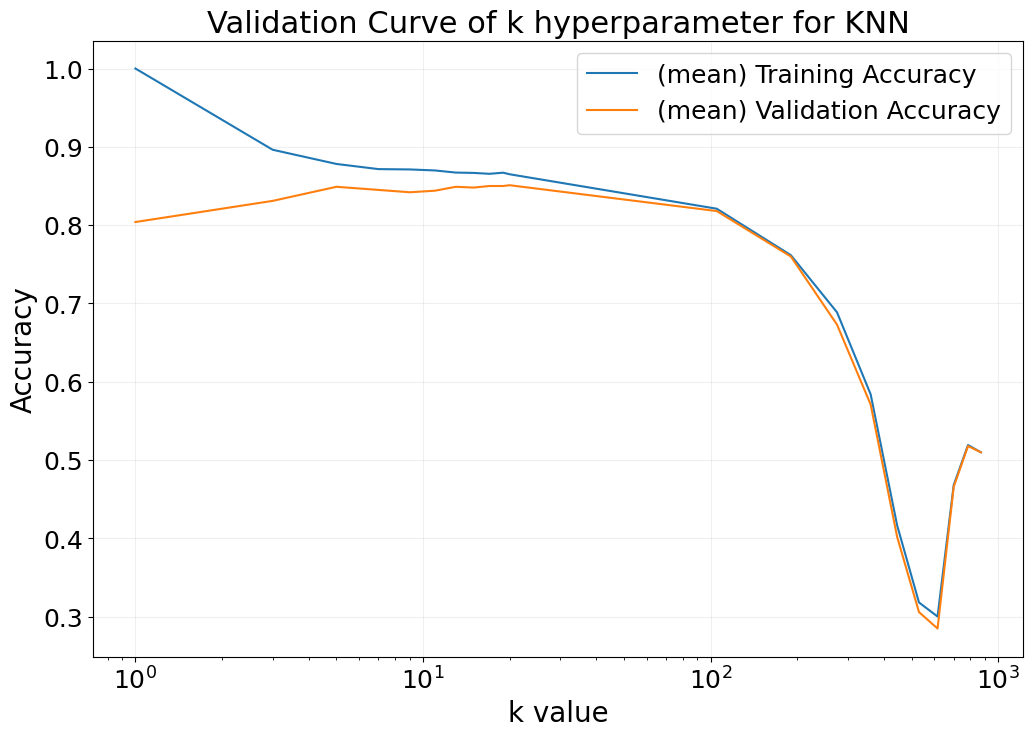



highest validation accuracy : 0.851) and 
training accuracy when the highest validation accuracy : 0.865
for k : 20


In [ ]:
from sklearn.model_selection import cross_validate

k_values = list(range(1, 20, 2)) + list(range(20, 871, 85))

train_score = []
test_score = []

highest_validation_accuracy = 0
k_for_highest_validation_accuracy = 0
training_accuracy_when_highest_validation_accuracy = 0

#find omptimal k
for k in k_values:
  knn_model = KNeighborsClassifier(n_neighbors=k)
  scores = cross_validate(knn_model, train_df_pcr_01_03, train_df_spread, cv=8, scoring='accuracy', return_train_score=True)
  training_accuracy = np.mean(scores['train_score'])
  train_score.append(training_accuracy)
  validation_accuracy = np.mean(scores['test_score'])
  test_score.append(validation_accuracy)
  if validation_accuracy > highest_validation_accuracy:
    k_for_highest_validation_accuracy = k
    highest_validation_accuracy = validation_accuracy
    training_accuracy_when_highest_validation_accuracy = training_accuracy


# Plot a validation curve
plt.figure(figsize=(12, 8))
plt.semilogx(k_values, train_score, label='(mean) Training Accuracy')
plt.semilogx(k_values, test_score, label='(mean) Validation Accuracy')
plt.title('Validation Curve of k hyperparameter for KNN')
plt.xlabel('k value')
plt.ylabel('Accuracy')
plt.grid(alpha=0.2)
plt.legend()
plt.show()

print(f'\n\nhighest validation accuracy : {highest_validation_accuracy}) and \n'
    f'training accuracy when the highest validation accuracy : {training_accuracy_when_highest_validation_accuracy}\n'
      f'for k : {k_for_highest_validation_accuracy}')


**(Q3)**

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


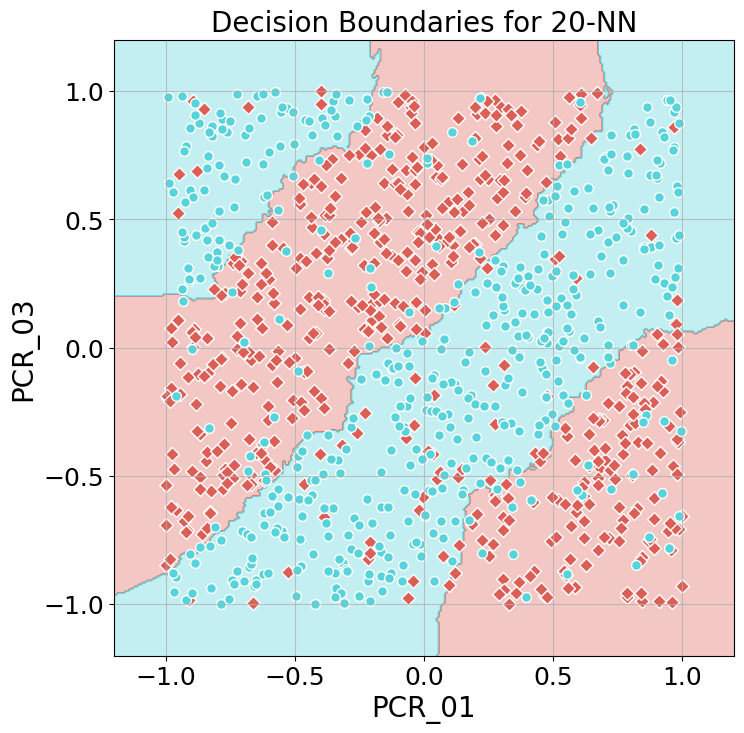


Training Accuracy: 0.866

Test Accuracy: 0.82





In [ ]:
#train optimal k model
knn_opt_model = KNeighborsClassifier(n_neighbors=k_for_highest_validation_accuracy)
knn_opt_model.fit(train_df_pcr_01_03, train_df_spread)

#visualize optimal k model
visualize_clf(knn_opt_model, train_df_pcr_01_03, train_df_spread,
              title=f'Decision Boundaries for {k_for_highest_validation_accuracy}-NN',
              xlabel="PCR_01",
              ylabel="PCR_03")

training_accuracy = knn_opt_model.score(train_df_pcr_01_03, train_df_spread)
test_accuracy = knn_opt_model.score(test_df_pcr_01_03, test_df_spread)

print("\nTraining Accuracy:", training_accuracy)
print("\nTest Accuracy:", test_accuracy)
print("\n\n")



#Part 2: Decision trees

**(Q5)**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

#prepare data
columns_to_exclude = ['spread', 'risk']
train_df_without_targets = train_df.drop(columns=columns_to_exclude)
train_df_risk = train_df['risk']

test_df_without_targets = test_df.drop(columns=columns_to_exclude)
test_df_risk = test_df['risk']

#create tree
id3_model = DecisionTreeClassifier(criterion="entropy", max_depth=3)
id3_model.fit(train_df_without_targets, train_df_risk)

training_accuracy = id3_model.score(train_df_without_targets, train_df_risk)
test_accuracy = id3_model.score(test_df_without_targets, test_df_risk)
print(f'Training Accuracy: {training_accuracy}')
print(f'Test Accuracy: {test_accuracy}')


Training Accuracy: 0.703
Test Accuracy: 0.688


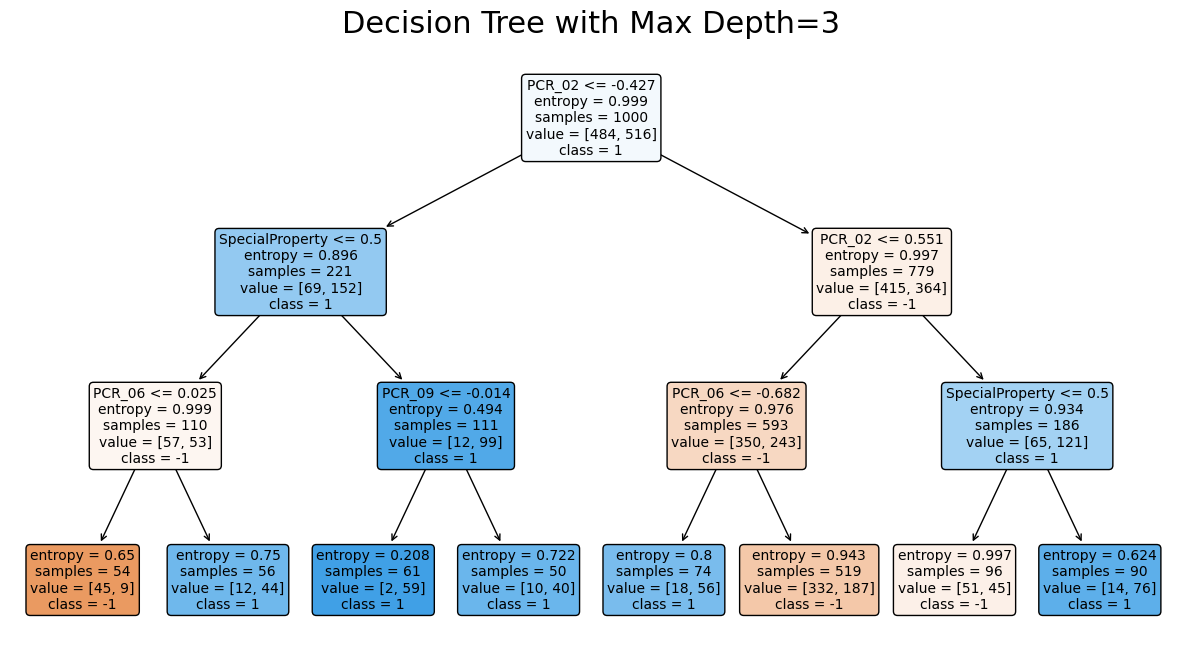

In [ ]:
#plot tree
fig, ax = plt.subplots(figsize=(15, 8))
plot_tree(id3_model, feature_names=train_df_without_targets.columns,
          class_names=[str(i) for i in id3_model.classes_], filled=True, rounded=True, fontsize= 10)

ax.set_title("Decision Tree with Max Depth=3")
plt.show()


##Model selection

**(Q6)**

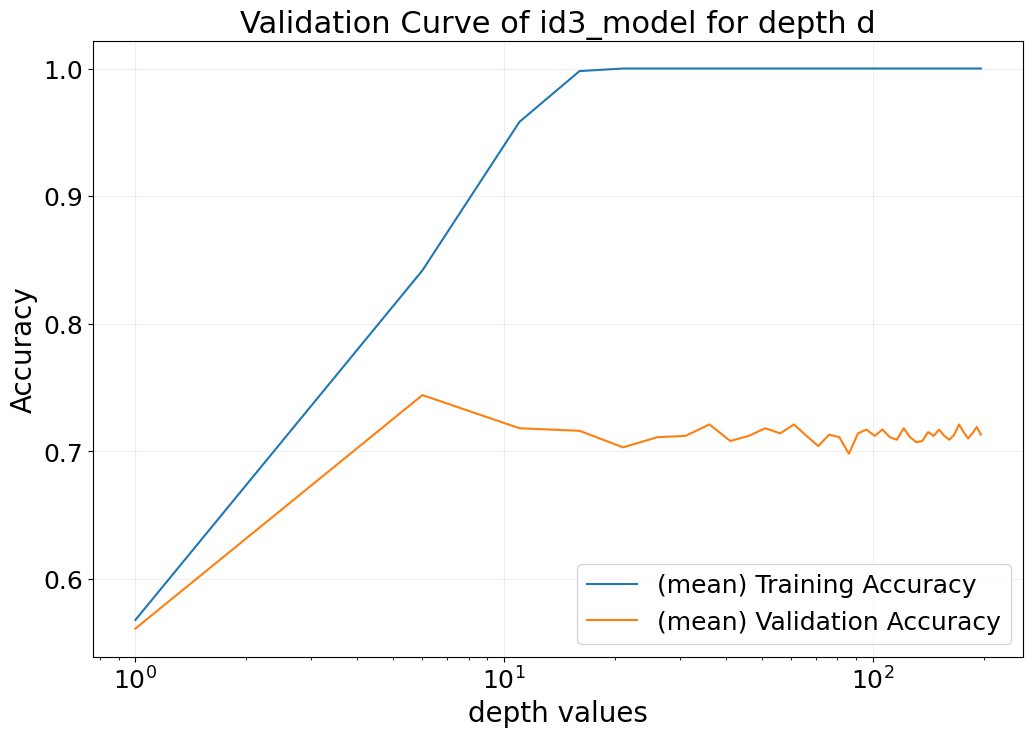



highest validation accuracy : 0.744) and 
training accuracy when the highest validation accuracy : 0.84175
for d : 6


In [ ]:
## for depth hyperparameters
depth_values = list(range(1, 200, 5))

train_score = []
test_score = []

highest_validation_accuracy = 0
d_for_highest_validation_accuracy = 0
training_accuracy_when_highest_validation_accuracy = 0


for d in depth_values:
  id3_model = DecisionTreeClassifier(criterion="entropy", max_depth=d)
  scores = cross_validate(id3_model, train_df_without_targets, train_df_risk, cv=5, scoring='accuracy', return_train_score=True)
  training_accuracy = np.mean(scores['train_score'])
  train_score.append(training_accuracy)
  validation_accuracy = np.mean(scores['test_score'])
  test_score.append(validation_accuracy)
  if validation_accuracy > highest_validation_accuracy:
    d_for_highest_validation_accuracy = d
    highest_validation_accuracy = validation_accuracy
    training_accuracy_when_highest_validation_accuracy = training_accuracy


# Plot a validation curve
plt.figure(figsize=(12, 8))
plt.semilogx(depth_values, train_score, label='(mean) Training Accuracy')
plt.semilogx(depth_values, test_score, label='(mean) Validation Accuracy')
plt.title('Validation Curve of id3_model for depth d')
plt.xlabel('depth values')
plt.ylabel('Accuracy')
plt.grid(alpha=0.2)
plt.legend()
plt.show()

print(f'\n\nhighest validation accuracy : {highest_validation_accuracy}) and \n'
    f'training accuracy when the highest validation accuracy : {training_accuracy_when_highest_validation_accuracy}\n'
      f'for d : {d_for_highest_validation_accuracy}')

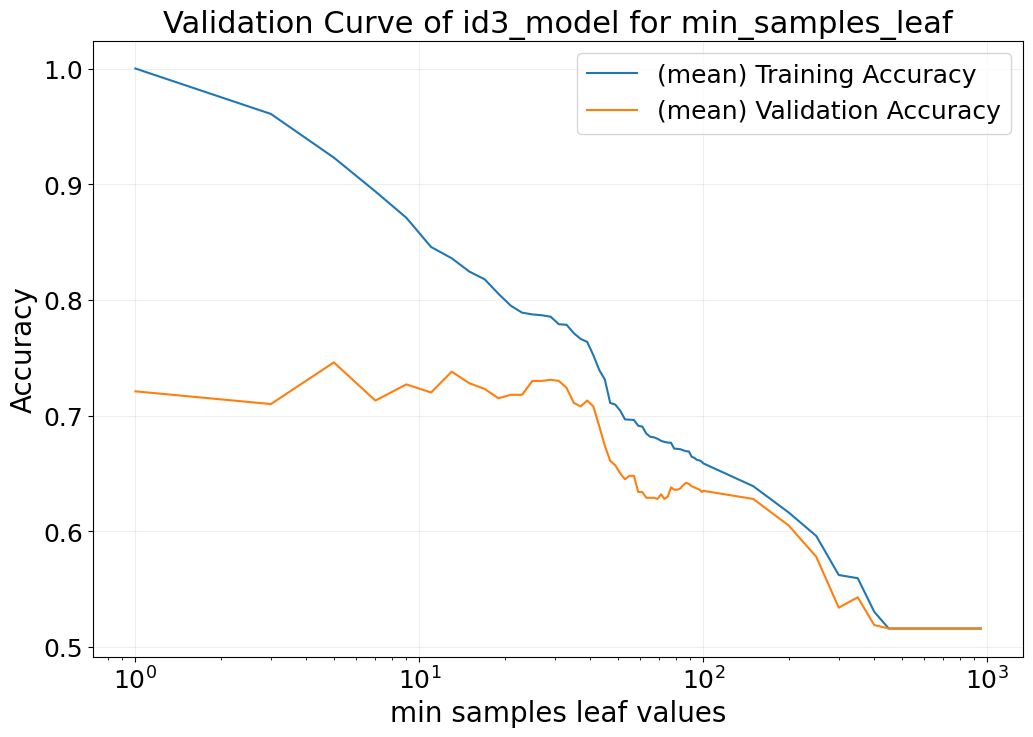



highest validation accuracy : 0.746) and 
training accuracy when the highest validation accuracy : 0.923
for m : 5


In [ ]:
## for min sample leaf hyperparameters
min_samples_leaf_values = list(range(1, 100, 2))+ list(range(100,1000,50))

train_score = []
test_score = []

highest_validation_accuracy = 0
m_for_highest_validation_accuracy = 0
training_accuracy_when_highest_validation_accuracy = 0

for m in min_samples_leaf_values:
  id3_model = DecisionTreeClassifier(criterion="entropy", min_samples_leaf= m)
  scores = cross_validate(id3_model, train_df_without_targets, train_df_risk, cv=5, scoring='accuracy', return_train_score=True)
  training_accuracy = np.mean(scores['train_score'])
  train_score.append(training_accuracy)
  validation_accuracy = np.mean(scores['test_score'])
  test_score.append(validation_accuracy)
  if validation_accuracy > highest_validation_accuracy:
    m_for_highest_validation_accuracy = m
    highest_validation_accuracy = validation_accuracy
    training_accuracy_when_highest_validation_accuracy = training_accuracy


# Plot a validation curve
plt.figure(figsize=(12, 8))
plt.semilogx(min_samples_leaf_values, train_score, label='(mean) Training Accuracy')
plt.semilogx(min_samples_leaf_values, test_score, label='(mean) Validation Accuracy')
plt.title('Validation Curve of id3_model for min_samples_leaf')
plt.xlabel('min samples leaf values')
plt.ylabel('Accuracy')
plt.grid(alpha=0.2)
plt.legend()
plt.show()

print(f'\n\nhighest validation accuracy : {highest_validation_accuracy}) and \n'
    f'training accuracy when the highest validation accuracy : {training_accuracy_when_highest_validation_accuracy}\n'
      f'for m : {m_for_highest_validation_accuracy}')

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': list(range(3, 20, 1)),
    'min_samples_leaf': list(range(1, 15, 1))+list(range(15, 50, 5))
    }
grid_search = GridSearchCV(DecisionTreeClassifier(criterion='entropy'),
                           param_grid, scoring='accuracy', cv=5, return_train_score=True)

grid_search.fit(train_df_without_targets, train_df_risk)
cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res_params = cv_res[['param_max_depth','param_min_samples_leaf', 'mean_train_score', 'mean_test_score']]
sorted_cv_res = cv_res_params.sort_values(by='mean_test_score', ascending=False)
sorted_cv_res.head(10)

,param_max_depth,param_min_samples_leaf,mean_train_score,mean_test_score
47,5,6,0.79225,0.754
46,5,5,0.79475,0.753
67,6,5,0.82575,0.753
130,9,5,0.88400,0.752
44,5,3,0.79850,0.749
42,5,1,0.80075,0.749
49,5,8,0.78700,0.748
48,5,7,0.78875,0.748
45,5,4,0.79600,0.747
68,6,6,0.82200,0.747


In [ ]:
print(grid_search.best_score_)
print(grid_search.best_params_)

0.754
{'max_depth': 5, 'min_samples_leaf': 6}


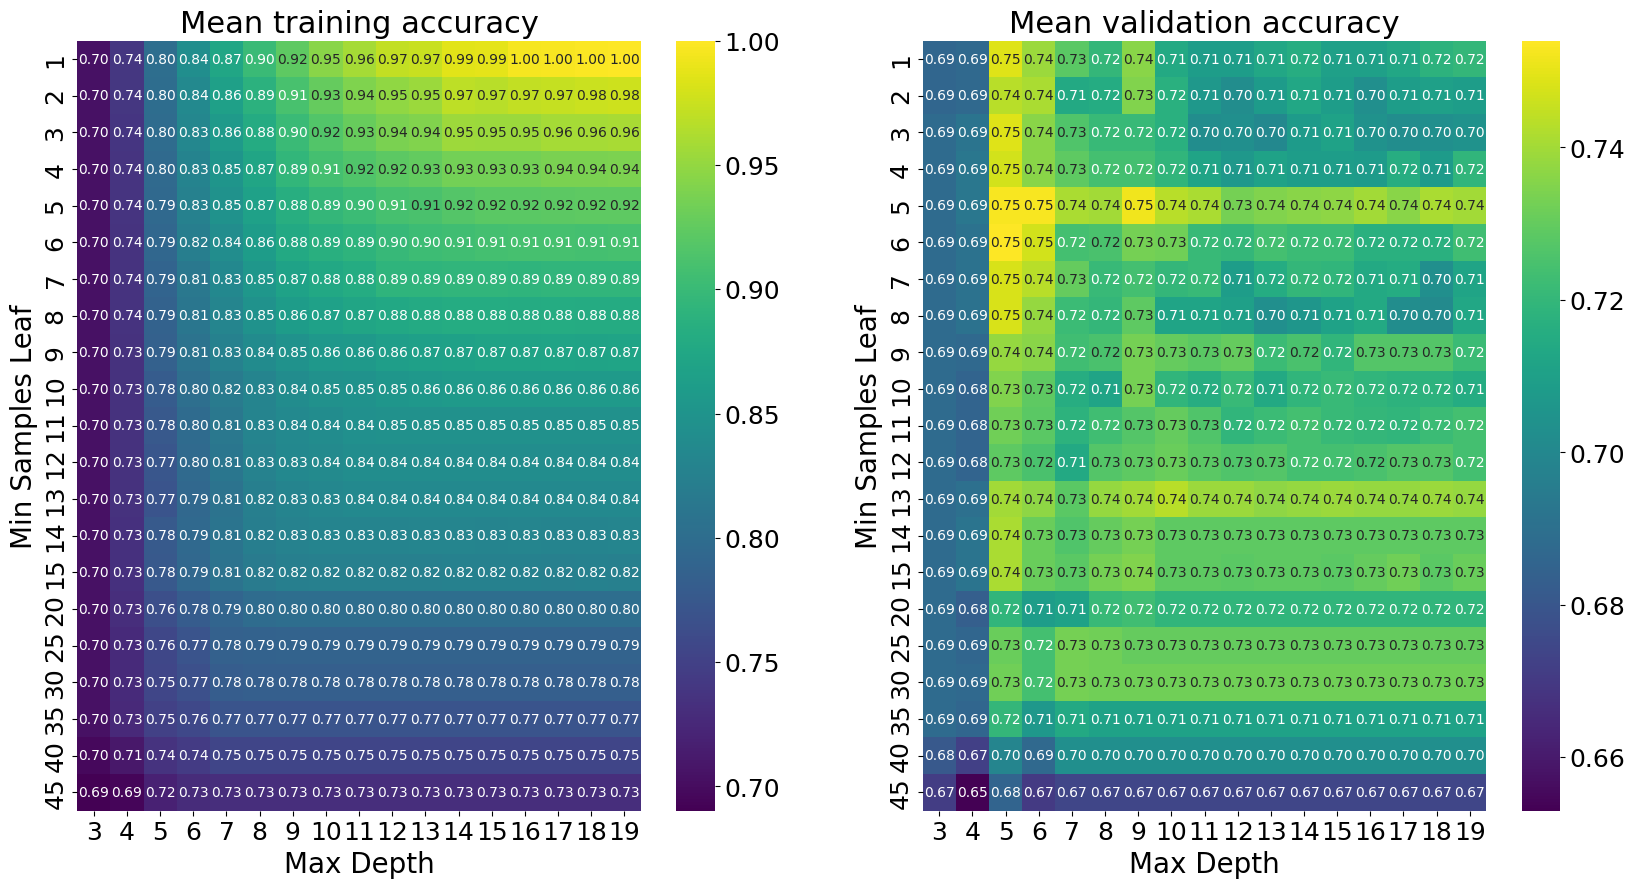

In [ ]:
#Create  pivot tables for heatmaps
cv_res['param_min_samples_leaf'] = pd.to_numeric(cv_res['param_min_samples_leaf'])
cv_res['param_max_depth'] = pd.to_numeric(cv_res['param_max_depth'])

train_scores_pivot = cv_res.pivot(index='param_min_samples_leaf', columns='param_max_depth', values='mean_train_score')
validation_scores_pivot = cv_res.pivot(index='param_min_samples_leaf', columns='param_max_depth', values='mean_test_score')

fig, ax = plt.subplots(1, 2, figsize=(20, 10))

# Heatmap for training accuracies
sns.heatmap(train_scores_pivot, annot=True, fmt=".2f", cmap="viridis", ax=ax[0])
ax[0].set_title('Mean training accuracy')
ax[0].set_xlabel("Max Depth")
ax[0].set_ylabel("Min Samples Leaf")

# Heatmap for validation accuracies
sns.heatmap(validation_scores_pivot, annot=True, fmt=".2f", cmap="viridis", ax=ax[1])
ax[1].set_title('Mean validation accuracy')
ax[1].set_xlabel("Max Depth")
ax[1].set_ylabel("Min Samples Leaf")

# Display the heatmaps
plt.show()


**(Q8)**

In [ ]:
id3_model = DecisionTreeClassifier(criterion="entropy", max_depth=6, min_samples_leaf=5)
id3_model.fit(train_df_without_targets, train_df_risk)

training_accuracy = id3_model.score(train_df_without_targets, train_df_risk)
test_accuracy = id3_model.score(test_df_without_targets, test_df_risk)
print(f'Training Accuracy: {training_accuracy}')
print(f'Test Accuracy: {test_accuracy}')

Training Accuracy: 0.823
Test Accuracy: 0.768


#Part 3: Linear SVM and the Polynomial kernelnel

##implementation of the loss and its gradient

In [ ]:
from sklearn.base import BaseEstimator, ClassifierMixin
import numpy as np

class SoftSVM(BaseEstimator, ClassifierMixin):
    """
    Custom C-Support Vector Classification.
    """
    def __init__(self, C: float, lr: float = 1e-5, batch_size = 32):
        """
        Initialize an instance of this class.
        ** Do not edit this method **

        :param C: inverse strength of regularization. Must be strictly positive.
        :param lr: the SGD learning rate (step size)
        """
        self.C = C
        self.lr = lr
        self.batch_size = batch_size
        self.w = None
        self.b = 0.0

    # Initialize a random weight vector
    def init_solution(self, n_features: int):
        """
        Randomize an initial solution (weight vector)
        ** Do not edit this method **

        :param n_features:
        """
        self.w = np.random.randn(n_features)
        self.b = 0.0

    @staticmethod
    def loss(w, b: float, C: float, X, y):
        """
        Compute the SVM objective loss.

        :param w: weight vector for linear classification; array of shape (n_features,)
        :param b: bias scalar for linear classification
        :param C: inverse strength of regularization. Must be strictly positive.
        :param X: samples for loss computation; array of shape (n_samples, n_features)
        :param y: targets for loss computation; array of shape (n_samples,)
        :return: the Soft SVM objective loss (float scalar)
        """
        margins = (X.dot(w) + b).reshape(-1, 1)
        hinge_inputs = np.multiply(margins, y.reshape(-1, 1))

        norm = np.linalg.norm(w)

        # TODP : complete the loss calculation
        loss = norm ** 2 + C * np.sum(np.maximum(0, 1 - hinge_inputs))
        return loss

    @staticmethod
    def subgradient(w, b: float, C: float, X, y):
        """
        Compute the (analytical) SVM objective sub-gradient.

        :param w: weight vector for linear classification; array of shape (n_features,)
        :param b: bias scalar for linear classification
        :param C: inverse strength of regularization. Must be strictly positive.
        :param X: samples for loss computation; array of shape (n_samples, n_features)
        :param y: targets for loss computation; array of shape (n_samples,)
        :return: a tuple with (the gradient of the weights, the gradient of the bias)
        """
        # TODO : calculate the analytical sub-gradient of soft-SVM w.r.t w and b
        y_vector = y.reshape(-1, 1)
        margins = (X.dot(w) + b).reshape(-1, 1)
        f_input = np.multiply(y_vector, margins).reshape(-1)
        f_func = np.where(f_input >= 1, 0, -1)

        g_w = 2*w + C * np.sum( np.multiply(f_func.reshape(-1, 1) , y_vector) * X , axis = 0)
        g_b = C * np.sum( f_func.reshape(-1, 1) * y_vector  )
        return g_w, g_b

    def fit_with_logs(self, X, y, max_iter: int = 2000, keep_losses: bool = True):
        """
        Fit the model according to the given training data.

        :param X: training samples; array of shape (n_samples, n_features)
        :param y: training targets (+1 and -1); array of shape (n_samples,)
        :param max_iter: number of SGD iterations
        :param keep_losses:
        :return: the training losses and accuracies during training
        """
        # Initialize learned parameters
        # lenth of each example, how much features.
        self.init_solution(X.shape[1])

        losses = []
        accuracies = []

        if keep_losses:
            losses.append(self.loss(self.w, self.b, self.C, X, y))
            accuracies.append(self.score(X, y))

        permutation = np.random.permutation(len(y))
        X = X[permutation, :]
        y = y[permutation]

        # Iterate over batches
        for iter in range(0, max_iter):
            start_idx = (iter * self.batch_size) % X.shape[0]
            end_idx = min(X.shape[0], start_idx + self.batch_size)
            batch_X = X[start_idx:end_idx, :]
            batch_y = y[start_idx:end_idx]

            # Compute the (sub)gradient of the current *batch*
            g_w, g_b = self.subgradient(self.w, self.b, self.C, batch_X, batch_y)

            # Perform a (sub)gradient step
            # TODO: update the learned parameters correctly
            self.w -= self.lr*g_w
            self.b -= self.lr*g_b
            #self.b = self.b-self.lr*g_b if self.b!= 0.0 else 0.0

            if keep_losses:
                losses.append(self.loss(self.w, self.b, self.C, X, y))
                accuracies.append(self.score(X, y))

        return losses, accuracies

    def fit(self, X, y, max_iter: int = 2000):
        """
        Fit the model according to the given training data.
        ** Do not edit this method **

        :param X: training samples; array of shape (n_samples, n_features)
        :param y: training targets (+1 and -1); array of shape (n_samples,)
        :param max_iter: number of SGD iterations
        """
        self.fit_with_logs(X, y, max_iter=max_iter, keep_losses=False)

        return self

    def predict(self, X):
        """
        Perform classification on samples in X.

        :param X: samples for prediction; array of shape (n_samples, n_features)
        :return: Predicted class labels for samples in X; array of shape (n_samples,)
                 NOTE: the labels must be either +1 or -1
        """
        # compute labels
        y_pred = np.sign( X.dot(self.w) + self.b).astype(int)

        # Set predictions of 0 to 1
        y_pred[y_pred == 0] = 1

        return y_pred


In [ ]:
def numerical_subgradient(w, b, C, X, y, delta=1e-4):
    w_ = w.copy()
    g_w = np.zeros_like(w_)
    orig_objective = SoftSVM.loss(w_, b, C, X, y)
    for i in range(g_w.shape[0]):
        w_[i] += delta
        perturbed_objective = SoftSVM.loss(w_, b, C, X, y)
        w_[i] -= delta
        g_w[i] = (perturbed_objective - orig_objective) / delta

    g_b = (SoftSVM.loss(w_, b + delta, C, X, y) - orig_objective) / delta
    return g_w, g_b



def compare_gradients(X, y, deltas, C=1, REPEATS=100, figsize=(10, 6)):
    residual_means = []

    for delta in deltas:
        residuals = []

        for _ in range(REPEATS):
            # Randomize vectors in which the gradient is computed
            w = np.random.randn(X.shape[1])
            b = np.random.randn(1)

            # Compute the two types of gradients
            analytic_grad = SoftSVM.subgradient(w, b, C, X, y)[0]
            numeric_grad = numerical_subgradient(w, b, C, X, y, delta=delta)[0]

            residual = np.linalg.norm(numeric_grad - analytic_grad)
            residuals.append(residual)

        residual_means.append(np.mean(residuals))

    plt.figure(figsize=figsize)
    plt.title('Residuals of analytical and numerical gradients', fontsize=22)
    plt.plot(deltas, residual_means, linewidth=3)
    plt.yscale('log')
    plt.xscale('log')
    plt.xlabel('$\delta$', fontsize=18)
    plt.ylabel(r'$\left\Vert \nabla_{w}p_{C}\left(w,b\right) - u_{\delta} \left(w,b\right)\right\Vert$', fontsize=18)

    plt.grid(alpha=0.5)
    plt.show()

**(Q9)**

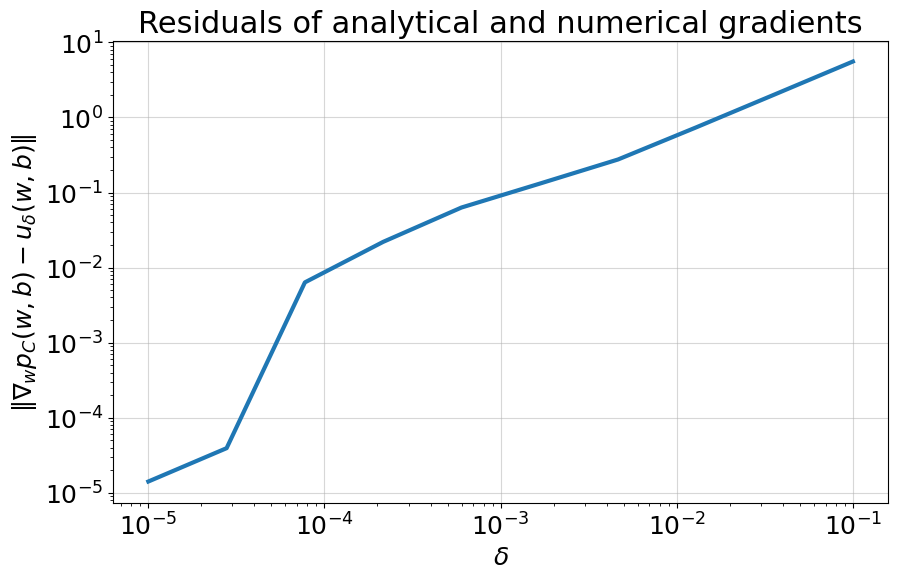

In [ ]:
#Preapre data
train_df_pcr_01_03 = train_df[['PCR_01', 'PCR_03']]
train_df_spread = train_df['spread']
X_train= train_df_pcr_01_03.to_numpy()
y_train = train_df_spread.to_numpy()

#test code
compare_gradients(X_train, y_train, deltas=np.logspace(-5, -1, 10))

##Solving Soft SVM problems using Stochastic Gradient Descent (SGD)


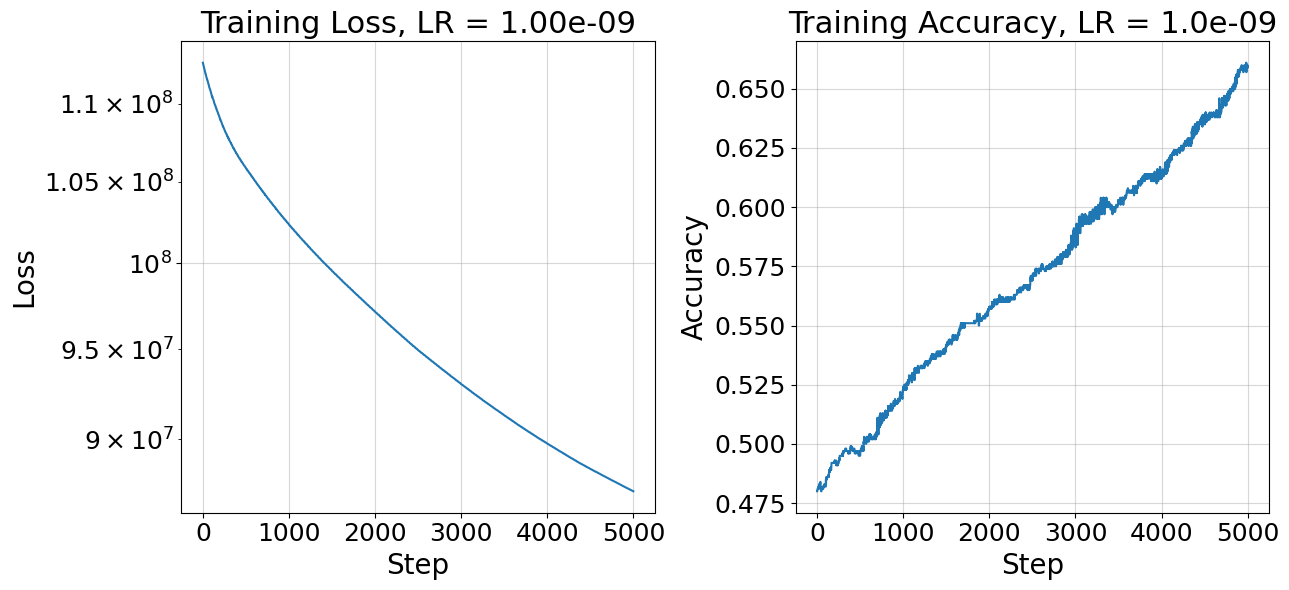

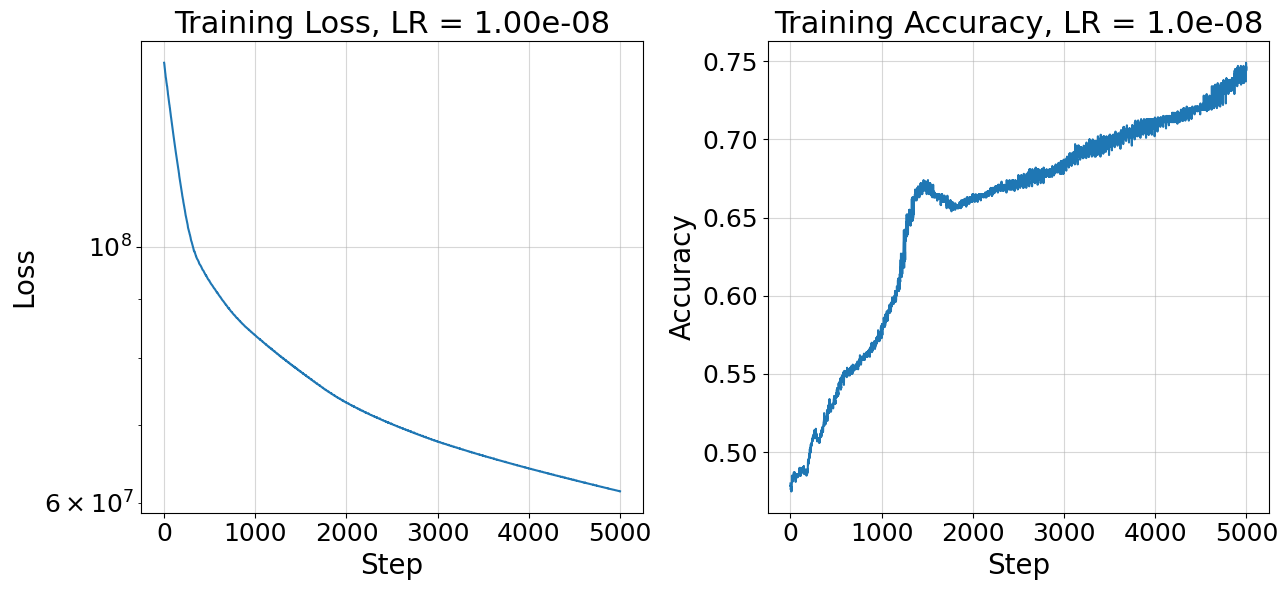

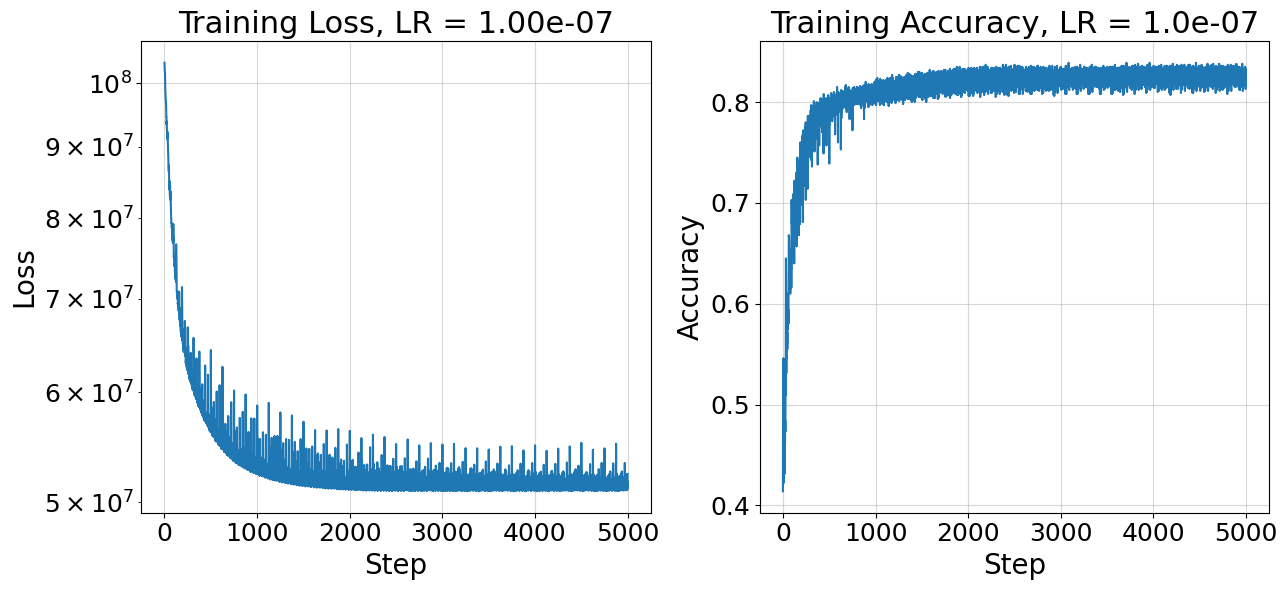

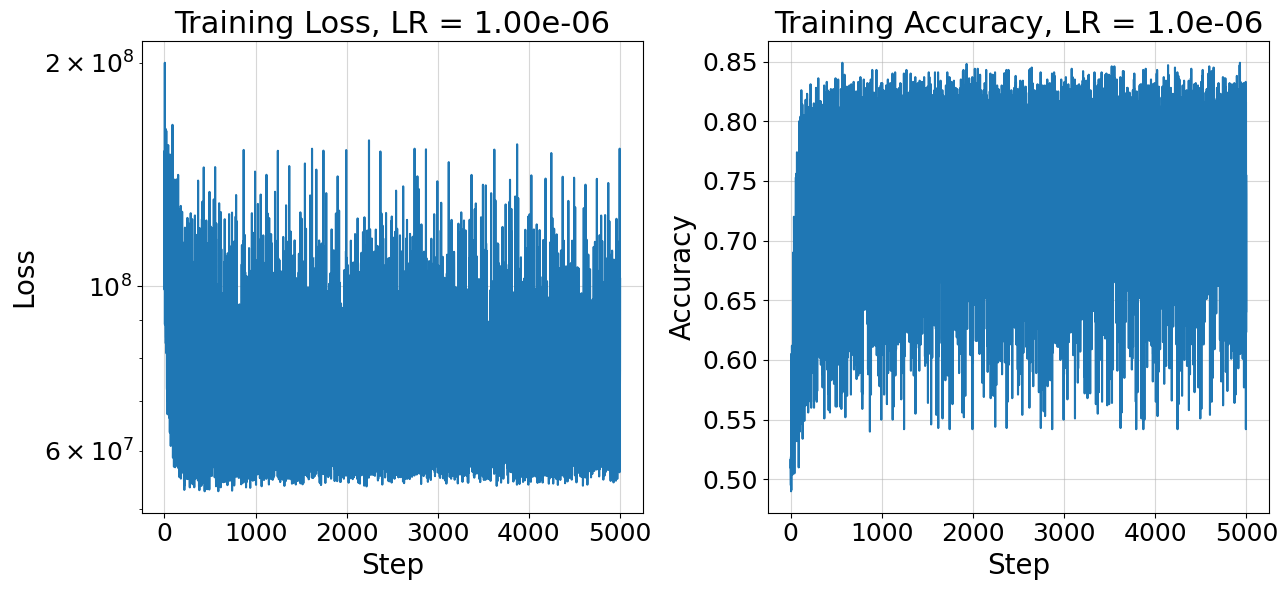

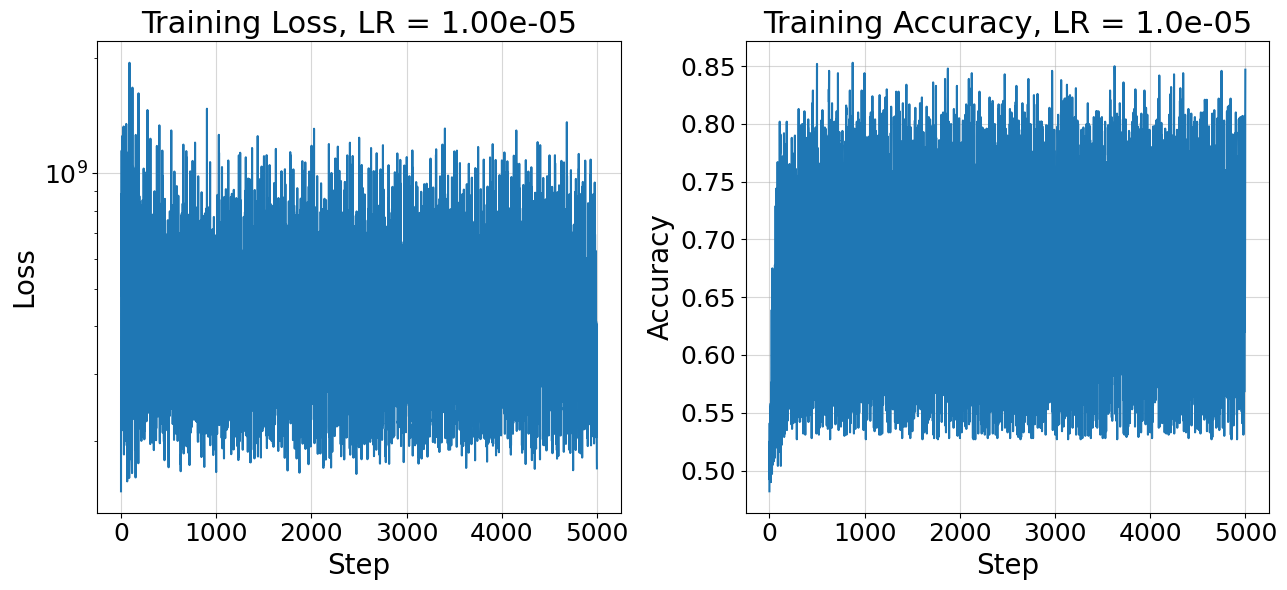

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
learning_rates = np.logspace(-9, -5, 5)

for lr in learning_rates:
  C=1e5
  clf = SoftSVM(C=C, lr=lr)
  X_train_poly = PolynomialFeatures(degree=3,).fit_transform(X_train)
  X_train_poly = MinMaxScaler(feature_range=(-1,1)).fit_transform(X_train_poly)
  losses, accuracies = clf.fit_with_logs(X_train_poly, y_train, max_iter=5000)
  plt.figure(figsize=(13, 6))
  plt.subplot(121), plt.grid(alpha=0.5), plt.title(f'Training Loss, LR = {lr:.2e}')
  plt.semilogy(losses), plt.xlabel("Step"), plt.ylabel("Loss")
  plt.subplot(122), plt.grid(alpha=0.5), plt.title (f'Training Accuracy, LR = {lr:.1e}')
  plt.plot(accuracies), plt.xlabel("Step"), plt.ylabel("Accuracy")
  plt.tight_layout()
  plt.show()

**(Q12)**

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but PolynomialFeatures was fitted without feature names
  warnings.warn(




training accuracy: 0.833
test accuracy: 0.78


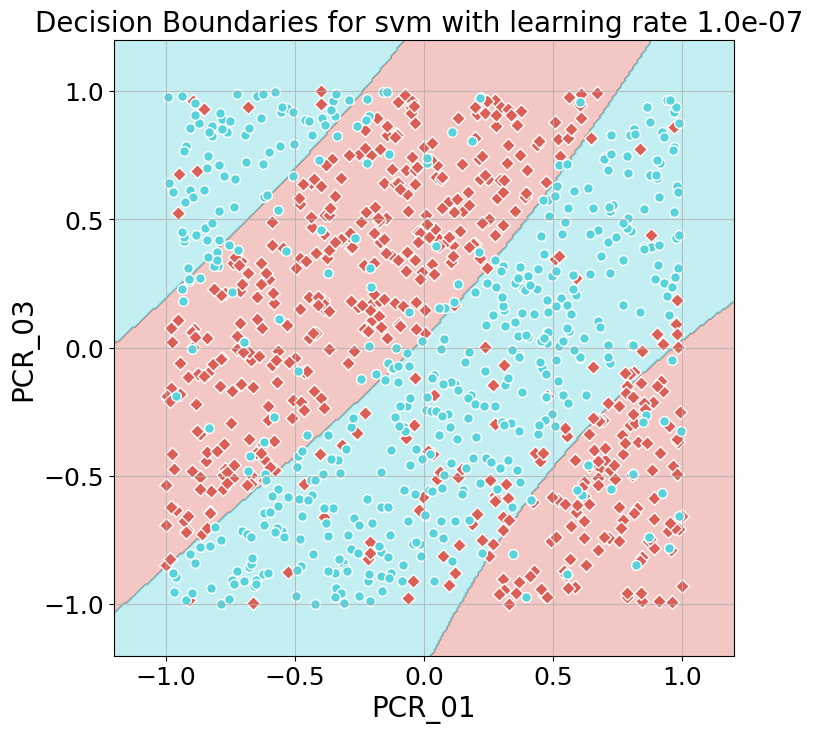

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

chosen_lr = learning_rates[2]
svm_clf = Pipeline( [('feature_mapping', PolynomialFeatures(degree=3,)),
                      ('scaler', MinMaxScaler(feature_range=(-1,1))),
                        ('SVM', SoftSVM(C=1e5, lr=chosen_lr))] )

svm_clf.fit(X_train, y_train, SVM__max_iter=5000)

training_accuracy = svm_clf.score(X_train, y_train)
test_accuracy = svm_clf.score(test_df_pcr_01_03, test_df_spread)

print("\n")
print(f'training accuracy: {training_accuracy}')
print(f'test accuracy: {test_accuracy}')

visualize_clf(svm_clf, X_train, y_train, title=f"Decision Boundaries for svm with learning rate {chosen_lr:.1e} ",
              xlabel="PCR_01", ylabel="PCR_03")

# Part 4: The RBF kernel

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


training accuracy: 0.51
test accuracy: 0.544


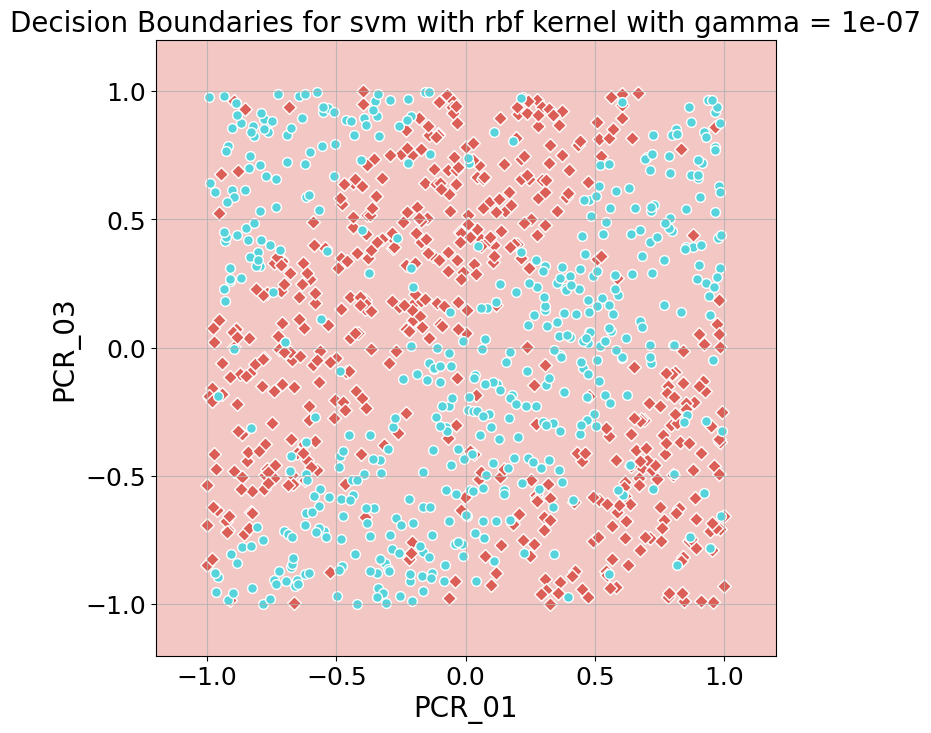

In [ ]:
#train svm rbf
from sklearn.svm import SVC
gamma = 1e-7
svm_rbf_clf = SVC(C=1, kernel='rbf', gamma=gamma)
svm_rbf_clf.fit(X_train, y_train)
training_accuracy_svm_rbf = svm_rbf_clf.score(X_train, y_train)
test_accuracy_svm_rbf = svm_rbf_clf.score(test_df_pcr_01_03, test_df_spread)
print(f'training accuracy: {training_accuracy_svm_rbf}')
print(f'test accuracy: {test_accuracy_svm_rbf}')
visualize_clf(svm_rbf_clf, X_train, y_train, title=f"Decision Boundaries for svm with rbf kernel with gamma = {gamma}", xlabel="PCR_01", ylabel="PCR_03")

**(Q15)**

training accuracy: 0.999
test accuracy: 0.688
b=[-0.03094057]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


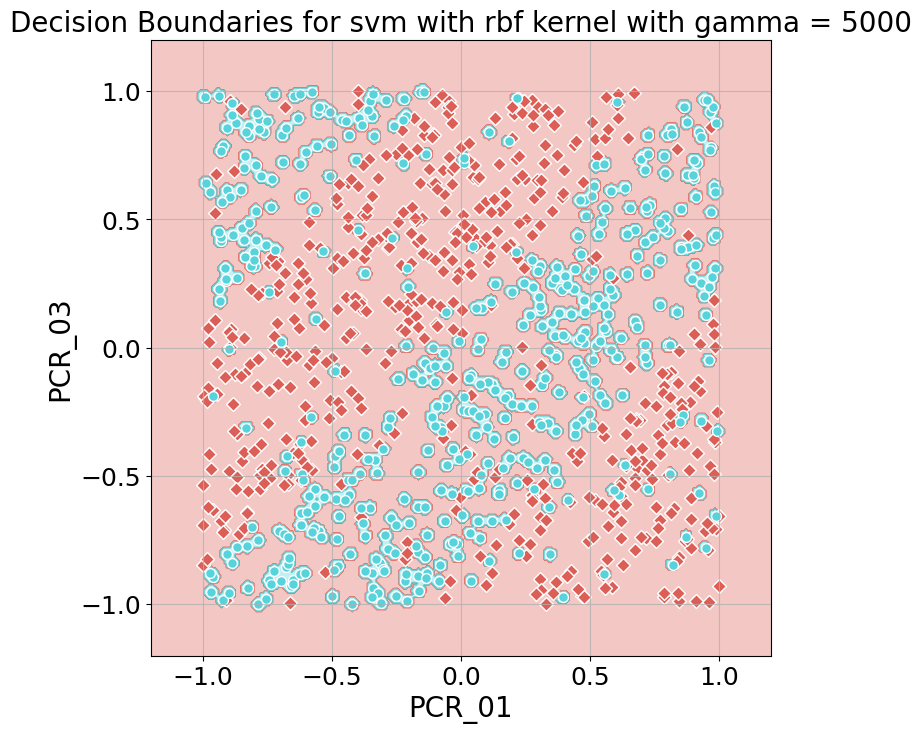

In [ ]:
#train svm rbf
from sklearn.svm import SVC
gamma = 5000
X_train = train_df_pcr_01_03
y_train = train_df_spread
svm_rbf_clf = SVC(C=1, kernel='rbf', gamma=gamma)
svm_rbf_clf.fit(X_train, y_train)
training_accuracy_svm_rbf = svm_rbf_clf.score(X_train, y_train)
test_accuracy_svm_rbf = svm_rbf_clf.score(test_df_pcr_01_03, test_df_spread)
print(f'training accuracy: {training_accuracy_svm_rbf}')
print(f'test accuracy: {test_accuracy_svm_rbf}')

intercept = svm_rbf_clf.intercept_
print(f'b={intercept}')

visualize_clf(svm_rbf_clf, X_train, y_train, title=f"Decision Boundaries for svm with rbf kernel with gamma = {gamma}", xlabel="PCR_01", ylabel="PCR_03")

# Part 5: Custom Feature Mapping

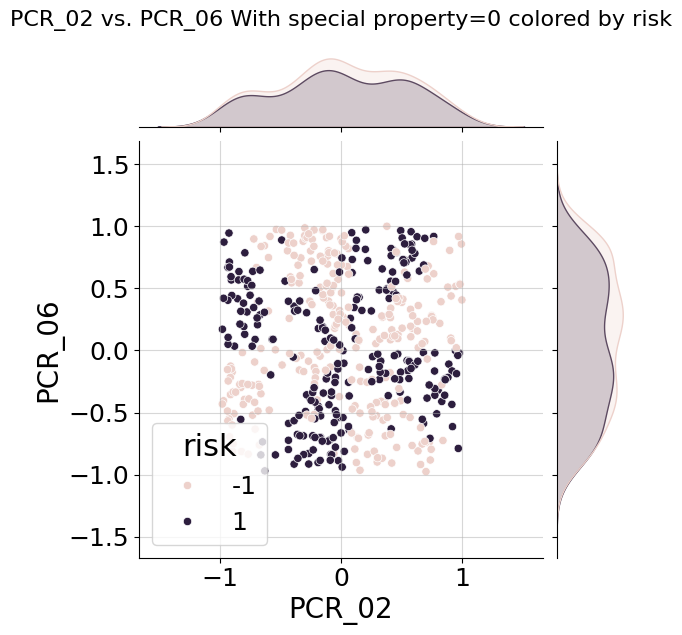

In [11]:
from sklearn.preprocessing import MinMaxScaler
#prepare data
X_train_pcr_02_06_risk= train_df[['PCR_02', 'PCR_06','SpecialProperty','risk']]
X_train_pcr_02_06_risk =X_train_pcr_02_06_risk[X_train_pcr_02_06_risk.SpecialProperty == 0]
X_train_pcr_02_06_risk= X_train_pcr_02_06_risk[['PCR_02', 'PCR_06','risk']]

X_test_pcr_02_06_risk= test_df[['PCR_02', 'PCR_06','SpecialProperty','risk']]
X_test_pcr_02_06_risk = X_test_pcr_02_06_risk[X_test_pcr_02_06_risk.SpecialProperty == 0]
X_test_pcr_02_06_risk = X_test_pcr_02_06_risk[['PCR_02', 'PCR_06','risk']]
#join plot 2- for other blood types left
jointplot = sns.jointplot(data=X_train_pcr_02_06_risk, x="PCR_02", y="PCR_06", hue="risk")
_ = jointplot.ax_joint.grid(alpha=0.5)


jointplot.fig.suptitle('PCR_02 vs. PCR_06 With special property=0 colored by risk', fontsize=16, y=1.05)
jointplot

In [12]:

# Calculate new feature "angle"
X_train_pcr_02_06_risk['angle'] = np.arctan2(X_train_pcr_02_06_risk['PCR_06'], X_train_pcr_02_06_risk['PCR_02'])

(-0.01, 0.12345435128419992)

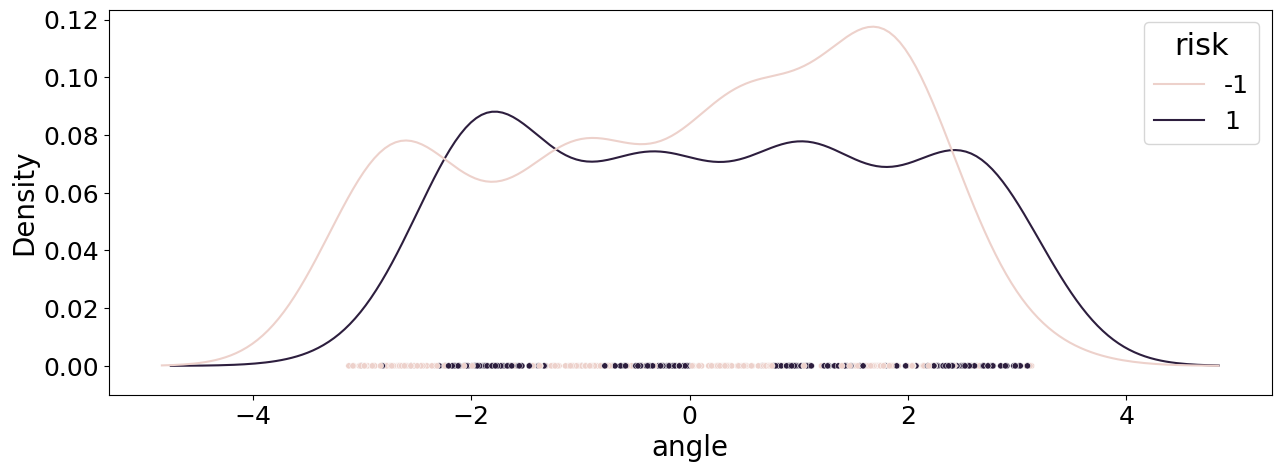

In [13]:

#plotr new feature
plt.figure(figsize=(15, 5))
sns.scatterplot(data=X_train_pcr_02_06_risk, x='angle', y=[0]*X_train_pcr_02_06_risk.shape[0], hue='risk', s=20)
sns.kdeplot(data= X_train_pcr_02_06_risk, x='angle', hue='risk', common_norm=True, fill=False)
plt.ylim(bottom=-1e-2)

In [14]:
beta=1
X_train_pcr_02_06_risk['sin_angle'] = np.sin(beta*X_train_pcr_02_06_risk['angle'])

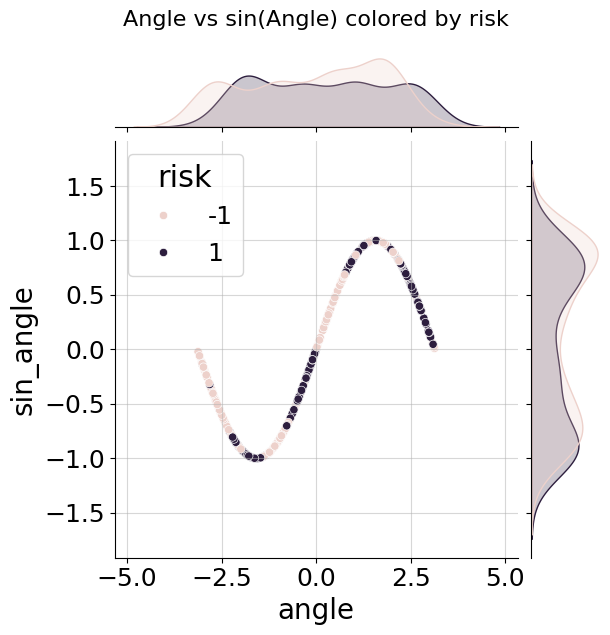

In [15]:
#join plot 2- for other blood types left
jointplot = sns.jointplot(data=X_train_pcr_02_06_risk, x="angle", y="sin_angle", hue="risk")
_ = jointplot.ax_joint.grid(alpha=0.5)


jointplot.fig.suptitle('Angle vs sin(Angle) colored by risk', fontsize=16, y=1.05)
jointplot

In [16]:
# Calculate new feature "angle", "sin angle"
# Calculate new feature "angle"
X_train_pcr_02_06_risk['angle'] = np.arctan2(X_train_pcr_02_06_risk['PCR_06'], X_train_pcr_02_06_risk['PCR_02'])
X_test_pcr_02_06_risk['angle'] = np.arctan2(X_test_pcr_02_06_risk['PCR_06'], X_test_pcr_02_06_risk['PCR_02'])

beta=4
X_train_pcr_02_06_risk['sin_angle'] = np.sin(beta*X_train_pcr_02_06_risk['angle'])
X_test_pcr_02_06_risk['sin_angle'] = np.sin(beta*X_test_pcr_02_06_risk['angle'])

X_train_sin = X_train_pcr_02_06_risk[['angle','sin_angle']]
y_train_sin = X_train_pcr_02_06_risk['risk']

columns_to_minmax = ['angle']

scaler_minmax = MinMaxScaler(feature_range=(-1,1)).fit(X_train_sin[columns_to_minmax])
X_train_sin[columns_to_minmax] = scaler_minmax.transform(X_train_sin[columns_to_minmax])

X_test_sin = X_test_pcr_02_06_risk[['angle','sin_angle']]
y_test_sin = X_test_pcr_02_06_risk['risk']

X_test_sin[columns_to_minmax] = scaler_minmax.transform(X_test_sin[columns_to_minmax])

<ipython-input-16-eda310b16895>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_sin[columns_to_minmax] = scaler_minmax.transform(X_train_sin[columns_to_minmax])
<ipython-input-16-eda310b16895>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_sin[columns_to_minmax] = scaler_minmax.transform(X_test_sin[columns_to_minmax])


Training Accuracy: 0.8310940499040307
Test Accuracy: 0.8396946564885496


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


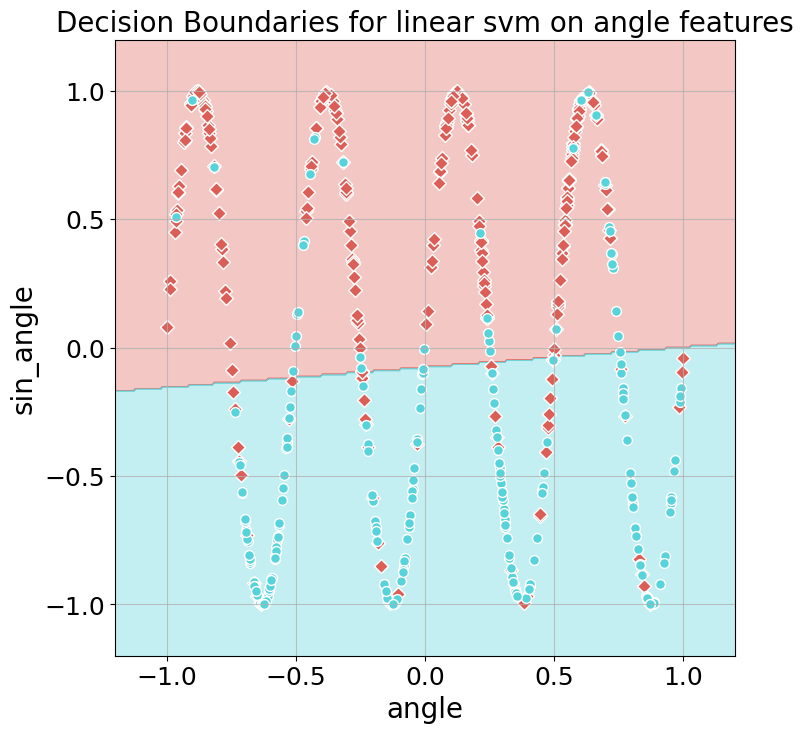

In [19]:
from sklearn.svm import LinearSVC
model_linear_svm = LinearSVC()
model_linear_svm.fit(X_train_sin, y_train_sin)

train_accuracy = model_linear_svm.score(X_train_sin, y_train_sin)
test_accuracy =  model_linear_svm.score(X_test_sin, y_test_sin)

print(f'Training Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')


visualize_clf(model_linear_svm, X_train_sin, y_train_sin, title=f"Decision Boundaries for linear svm on angle features", xlabel="angle", ylabel="sin_angle")
